<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_python/3_3_1_IMDB_subwords_LSTM_Conv1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.3.1. 다양한 유형의 시퀀스 모델을 탐색 


1) Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteD2CEX1/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteD2CEX1/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteD2CEX1/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [5]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 205s 441ms/step - loss: 0.5832 - accuracy: 0.6649 - val_loss: 0.4973 - val_accuracy: 0.7817
Epoch 2/10
391/391 [==============================] - 173s 440ms/step - loss: 0.3856 - accuracy: 0.8446 - val_loss: 0.4672 - val_accuracy: 0.7840
Epoch 3/10
391/391 [==============================] - 173s 442ms/step - loss: 0.3404 - accuracy: 0.8631 - val_loss: 0.3987 - val_accuracy: 0.8341
Epoch 4/10
391/391 [==============================] - 173s 441ms/step - loss: 0.2561 - accuracy: 0.9049 - val_loss: 0.4651 - val_accuracy: 0.8514
Epoch 5/10
391/391 [==============================] - 171s 437ms/step - loss: 0.2368 - accuracy: 0.9107 - val_loss: 0.4286 - val_accuracy: 0.8372
Epoch 6/10
391/391 [==============================] - 171s 437ms/step - loss: 0.1640 - accuracy: 0.9417 - val_loss: 0.8100 - val_accuracy: 0.6649
Epoch 7/10
391/391 [==============================] - 172s 440ms/step - loss: 0.3089 - accuracy: 0.8666 - val_loss: 0.5359 -

In [6]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

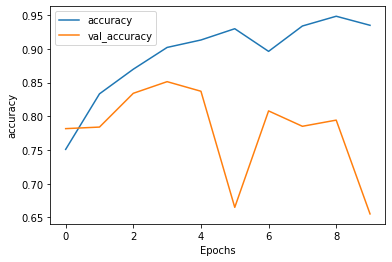

In [7]:
plot_graphs(history, 'accuracy')

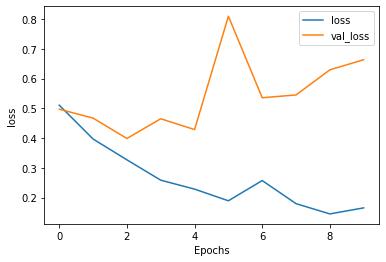

In [8]:
plot_graphs(history, 'loss')

2) Multiple Layer LSTM

LSTM 1개 더 추가

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 329s 825ms/step - loss: 0.6582 - accuracy: 0.5803 - val_loss: 0.5243 - val_accuracy: 0.7476
Epoch 2/10
391/391 [==============================] - 322s 824ms/step - loss: 0.4465 - accuracy: 0.8030 - val_loss: 0.5423 - val_accuracy: 0.7374
Epoch 3/10
391/391 [==============================] - 323s 822ms/step - loss: 0.3866 - accuracy: 0.8415 - val_loss: 0.5991 - val_accuracy: 0.7021
Epoch 4/10
391/391 [==============================] - 320s 816ms/step - loss: 0.3733 - accuracy: 0.8550 - val_loss: 0.3723 - val_accuracy: 0.8466
Epoch 5/10
391/391 [==============================] - 320s 818ms/step - loss: 0.2332 - accuracy: 0.9168 - val_loss: 0.3542 - val_accuracy: 0.8647
Epoch 6/10
391/391 [==============================] - 318s 812ms/step - loss: 0.1695 - accuracy: 0.9405 - val_loss: 0.3572 - val_accuracy: 0.8622
Epoch 7/10
391/391 [==============================] - 316s 808ms/step - loss: 0.1289 - accuracy: 0.9585 - val_loss: 0.4096 -

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

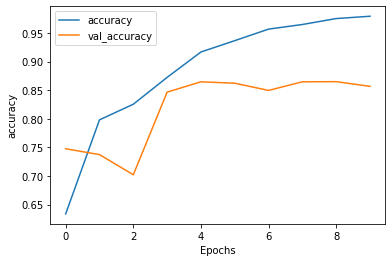

In [12]:
plot_graphs(history, 'accuracy')

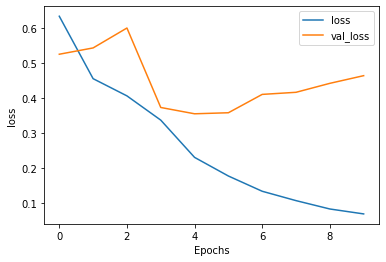

In [13]:
plot_graphs(history, 'loss')

3) Conv1D + GlobalAveragePooling + IMDB 서브 워드 8K

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [16]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 52s 130ms/step - loss: 0.5813 - accuracy: 0.6619 - val_loss: 0.3153 - val_accuracy: 0.8750
Epoch 2/10
391/391 [==============================] - 28s 69ms/step - loss: 0.2305 - accuracy: 0.9153 - val_loss: 0.3039 - val_accuracy: 0.8790
Epoch 3/10
391/391 [==============================] - 26s 65ms/step - loss: 0.1669 - accuracy: 0.9412 - val_loss: 0.3388 - val_accuracy: 0.8700
Epoch 4/10
391/391 [==============================] - 24s 61ms/step - loss: 0.1358 - accuracy: 0.9533 - val_loss: 0.3725 - val_accuracy: 0.8696
Epoch 5/10
391/391 [==============================] - 23s 58ms/step - loss: 0.1030 - accuracy: 0.9666 - val_loss: 0.4121 - val_accuracy: 0.8639
Epoch 6/10
391/391 [==============================] - 23s 56ms/step - loss: 0.0790 - accuracy: 0.9762 - val_loss: 0.4843 - val_accuracy: 0.8579
Epoch 7/10
391/391 [==============================] - 22s 56ms/step - loss: 0.0729 - accuracy: 0.9772 - val_loss: 0.4986 - val_accuracy

In [17]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

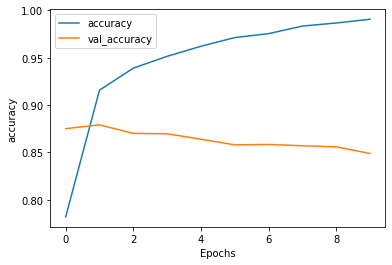

In [18]:
plot_graphs(history, 'accuracy')

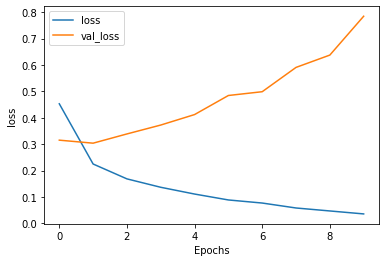

In [19]:
plot_graphs(history, 'loss')